# Import Libraries

In [54]:
# Basics
import numpy as np
import matplotlib.pyplot as plt

# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model

# Images
import os
from PIL import Image

# Evaluation
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, auc, roc_curve, RocCurveDisplay

# Import Data

In [10]:
# get paths of train / test data
path_train = os.path.join(os.getcwd(), 'hotdog_data', 'train')
path_test = os.path.join(os.getcwd(), 'hotdog_data', 'test')

# Pre-Processing

## Training

In [11]:
# build training set
classes = ['hotdog', 'nothotdog']
images = []
image_labels = []
for c in classes:
    for file in os.listdir(os.path.join(path_train, c)):        # locate all image files for given class
        file_path = os.path.join(path_train, c, file)           # compile new file path
        image = np.array(Image.open(file_path))                 # convert image to array
        image_labels.append(np.where(c=='hotdog', 1, 0))        # assign label to image
        images.append(image)                                    # storage


## Testing

In [12]:
# build testing set
test_imgs = []
test_labels = []
for c in classes:
    for file in os.listdir(os.path.join(path_test, c)):
        file_path = os.path.join(path_test, c, file)
        image = np.array(Image.open(file_path))
        test_labels.append(np.where(c=='hotdog', 1, 0))
        test_imgs.append(image)

In [13]:
# inspect train
X_train = np.array(images)          # 3000 images in the train set
print(X_train.shape)                # image size is 299x299 with 3 color channels
y_train = np.array(image_labels)    # 3000 labels in the train set
print(y_train.shape)

(3000, 299, 299, 3)
(3000,)


In [14]:
# inspect test
X_test = np.array(test_imgs)        # 644 images in the test set
print(X_test.shape)                 # image size is 299x299 with 3 color channels
y_test = np.array(test_labels)      # 644 labels in the test set
print(y_test.shape)

(644, 299, 299, 3)
(644,)


## Resize

In [15]:
# reduce dtype size
X_train = X_train.astype('float16')     # reduce size for memory considerations
X_test = X_test.astype('float16')

# normalize values
X_train /= 255.
X_test /= 255.

## Baseline Model

In [42]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1500, 1500], dtype=int64))

In [41]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([322, 322], dtype=int64))

Data is balanced. Accuracy will be used as the primary metric for success

# Model Structures

Model 0

In [43]:
# build model layers
model_0 = Sequential()
model_0.add(
    Conv2D(
        filters=16,
        kernel_size=(4, 4),
        activation='relu',
        input_shape=(299, 299, 3)
    )
  )
model_0.add(MaxPooling2D(pool_size=(2, 2)))
model_0.add(
    Conv2D(
        filters=32,
        kernel_size=(2, 2),
        activation='relu',
    )
  )
model_0.add(MaxPooling2D(pool_size=(2, 2)))
model_0.add(Flatten())
model_0.add(Dense(256, activation='relu'))
model_0.add(Dropout(.5))
model_0.add(Dense(128, activation='relu'))
model_0.add(Dropout(.3))
model_0.add(Dense(1, activation='sigmoid'))

In [44]:
# inspect model layers
model_0.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 296, 296, 16)      784       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 147, 147, 32)      2080      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 170528)            0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               43655424  
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)             

In [45]:
# build model layers
model_1 = Sequential()
model_1.add(
    Conv2D(
        filters=32,                             # more filters
        kernel_size=(4, 4),
        activation='relu',
        input_shape=(299, 299, 3)
    )
  )
model_1.add(MaxPooling2D(pool_size=(2, 2)))     # Reduce 
model_1.add(
    Conv2D(
        filters=64,                             # more filters
        kernel_size=(2, 2),
        activation='relu',
    )
  )
model_1.add(MaxPooling2D(pool_size=(2, 2)))     # Reduce
model_1.add(Flatten())                          # Flatten for Feed Forward

model_1.add(Dense(256, activation='relu'))      # First Dense layer
model_1.add(Dropout(.5))                        # Regularization
model_1.add(Dense(128, activation='relu'))      # Second Dense layer
model_1.add(Dropout(.3))                        # Regularization
model_1.add(Dense(1, activation='sigmoid'))     # Output layer

In [46]:
# build model layers
model_2 = Sequential()
model_2.add(
    Conv2D(
        filters=32,
        kernel_size=(4, 4),
        activation='relu',
        input_shape=(299, 299, 3)
    )
  )
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(
    Conv2D(
        filters=64,
        kernel_size=(2, 2),
        activation='relu',
    )
  )
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())

model_2.add(Dense(512, activation='relu'))      # More nodes
model_2.add(Dropout(.5))
model_2.add(Dense(256, activation='relu'))      # more nodes
model_2.add(Dropout(.3))
model_2.add(Dense(1, activation='sigmoid'))

In [47]:
# build model layers
model_3 = Sequential()
model_3.add(
    Conv2D(
        filters=16,
        kernel_size=(4, 4),
        activation='relu',
        input_shape=(299, 299, 3)
    )
  )
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(
    Conv2D(
        filters=32,
        kernel_size=(2, 2),
        activation='relu',
    )
  )
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())

model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(.5))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(.3))
model_3.add(Dense(64, activation='relu'))      # deeper structure
model_3.add(Dropout(.15))
model_3.add(Dense(1, activation='sigmoid'))

In [48]:
# build model layers
model_4 = Sequential()
model_4.add(
    Conv2D(
        filters=32,                             # more features for deeper model
        kernel_size=(4, 4),
        activation='relu',
        input_shape=(299, 299, 3)
    )
  )
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(
    Conv2D(
        filters=64,                             # more features for deeper model
        kernel_size=(2, 2),
        activation='relu',
    )
  )
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())

model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(.5))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(.3))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(.15))
model_4.add(Dense(1, activation='sigmoid'))

In [49]:
# build model layers
model_5 = Sequential()
model_5.add(
    Conv2D(
        filters=64,
        kernel_size=(4, 4),
        activation='relu',
        input_shape=(299, 299, 3)
    )
  )
model_5.add(MaxPooling2D(pool_size=(2, 2)))         # less pooling/flattening (longer train times)
model_5.add(Flatten())

model_5.add(Dense(256, activation='relu'))
model_5.add(Dropout(.5))
model_5.add(Dense(128, activation='relu'))
model_5.add(Dropout(.3))
model_5.add(Dense(1, activation='sigmoid'))

In [50]:
# build model layers
model_6 = Sequential()
model_6.add(
    Conv2D(
        filters=64,
        kernel_size=(4, 4),
        activation='relu',
        input_shape=(299, 299, 3)
    )
  )
model_6.add(MaxPooling2D(pool_size=(2, 2)))         # less pooling/flattening (longer train times)
model_6.add(Flatten())

model_6.add(Dense(256, activation='relu'))
model_6.add(Dropout(.5))
model_6.add(Dense(128, activation='relu'))
model_6.add(Dropout(.3))
model_6.add(Dense(64, activation='relu'))
model_6.add(Dropout(.15))
model_6.add(Dense(1, activation='sigmoid'))

In [51]:
def fit_model(clfs):
    clf_log = {}
    for i, clf in enumerate(clfs):

        early_stop = EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=3,
        verbose=1,
        )

        # compile model
        clf.compile(
        loss='bce',
        optimizer = 'adam',
        metrics = ['accuracy']
        )

        # Fit Model
        history = clf.fit(
            x=X_train, 
            y=y_train,
            batch_size=256,
            validation_data=(X_test, y_test),
            epochs=100,
            callbacks=early_stop
            )

        # Evaluate Model
        print(clf.evaluate(X_test, y_test))

        # View Model Performance
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy');
        plt.plot(history.history['accuracy'], label='Training Accuracy');
        plt.title('CNN Performance on Hotdogs', fontsize=18)
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.legend()
        plt.show();

        # Predict Test Set
        pred = clf.predict(X_test)

        acc_score = np.round(accuracy_score(y_test, np.where(pred.flatten() >= .5, 1, 0)) * 100, 1)
        print(f'Accuracy: {acc_score}')
        
        fpr, tpr, thresholds = roc_curve(y_test, pred.flatten())
        roc_auc = np.round(auc(fpr, tpr) * 100, 1)

        RocCurveDisplay.from_predictions(y_test, pred.flatten());
        plt.show()

        ConfusionMatrixDisplay.from_predictions(y_test, np.where(pred.flatten() >= .5, 1, 0), cmap='Blues')
        plt.show()

        # Log Results
        clf_log[i] = {'acc': acc_score, 'auc': roc_auc}

    return clf_log

Epoch 1/100
12/12 [==============================] - 64s 5s/step - loss: 3.4881 - accuracy: 0.5000 - val_loss: 0.6744 - val_accuracy: 0.5512
Epoch 2/100
12/12 [==============================] - 65s 5s/step - loss: 0.7219 - accuracy: 0.5500 - val_loss: 0.6667 - val_accuracy: 0.6351
Epoch 3/100
12/12 [==============================] - 64s 5s/step - loss: 0.6467 - accuracy: 0.6280 - val_loss: 0.6270 - val_accuracy: 0.6429
Epoch 4/100
12/12 [==============================] - 64s 5s/step - loss: 0.6162 - accuracy: 0.6647 - val_loss: 0.6205 - val_accuracy: 0.6537
Epoch 5/100
12/12 [==============================] - 63s 5s/step - loss: 0.5878 - accuracy: 0.6977 - val_loss: 0.5933 - val_accuracy: 0.6894
Epoch 6/100
12/12 [==============================] - 63s 5s/step - loss: 0.5645 - accuracy: 0.7183 - val_loss: 0.5868 - val_accuracy: 0.6988
Epoch 7/100
12/12 [==============================] - 63s 5s/step - loss: 0.5393 - accuracy: 0.7413 - val_loss: 0.5983 - val_accuracy: 0.7127
Epoch 8/100
1

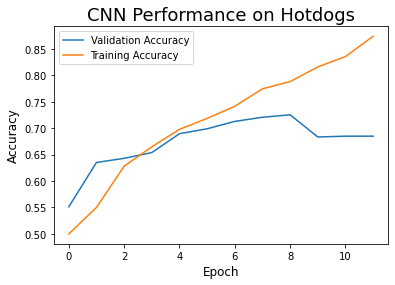

Accuracy: 68.5


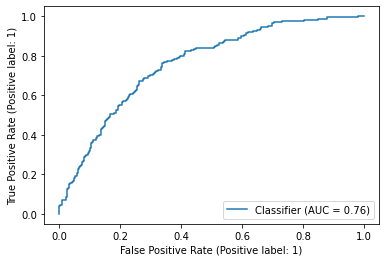

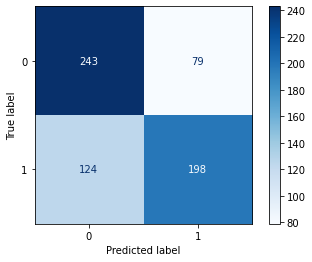

Epoch 1/100
12/12 [==============================] - 103s 9s/step - loss: 5.8555 - accuracy: 0.5023 - val_loss: 0.7081 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 105s 9s/step - loss: 0.7054 - accuracy: 0.5120 - val_loss: 0.6858 - val_accuracy: 0.5016
Epoch 3/100
12/12 [==============================] - 106s 9s/step - loss: 0.6564 - accuracy: 0.6030 - val_loss: 0.6267 - val_accuracy: 0.6553
Epoch 4/100
12/12 [==============================] - 105s 9s/step - loss: 0.6228 - accuracy: 0.6587 - val_loss: 0.6298 - val_accuracy: 0.6351
Epoch 5/100
12/12 [==============================] - 106s 9s/step - loss: 0.5783 - accuracy: 0.6967 - val_loss: 0.5949 - val_accuracy: 0.7065
Epoch 6/100
12/12 [==============================] - 105s 9s/step - loss: 0.5169 - accuracy: 0.7470 - val_loss: 0.5888 - val_accuracy: 0.7205
Epoch 7/100
12/12 [==============================] - 105s 9s/step - loss: 0.4400 - accuracy: 0.8043 - val_loss: 0.5983 - val_accuracy: 0.7174
Epoch 

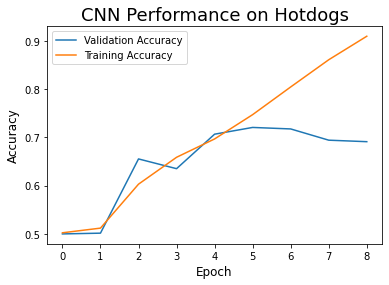

Accuracy: 69.1


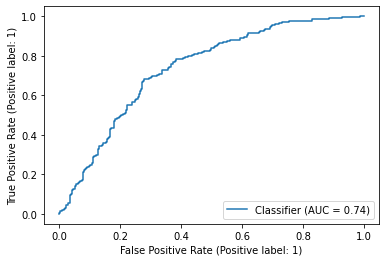

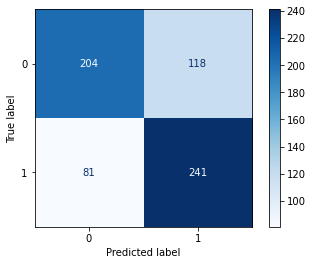

Epoch 1/100
12/12 [==============================] - 114s 10s/step - loss: 7.5545 - accuracy: 0.5020 - val_loss: 0.6848 - val_accuracy: 0.5590
Epoch 2/100
12/12 [==============================] - 113s 9s/step - loss: 0.7822 - accuracy: 0.5643 - val_loss: 0.6350 - val_accuracy: 0.6242
Epoch 3/100
12/12 [==============================] - 113s 9s/step - loss: 0.6164 - accuracy: 0.6580 - val_loss: 0.6037 - val_accuracy: 0.6925
Epoch 4/100
12/12 [==============================] - 113s 9s/step - loss: 0.5695 - accuracy: 0.7077 - val_loss: 0.6547 - val_accuracy: 0.6491
Epoch 5/100
12/12 [==============================] - 113s 9s/step - loss: 0.5230 - accuracy: 0.7497 - val_loss: 0.5935 - val_accuracy: 0.7081
Epoch 6/100
12/12 [==============================] - 113s 9s/step - loss: 0.4135 - accuracy: 0.8187 - val_loss: 0.6189 - val_accuracy: 0.7143
Epoch 7/100
12/12 [==============================] - 114s 9s/step - loss: 0.2863 - accuracy: 0.8873 - val_loss: 0.6956 - val_accuracy: 0.6879
Epoch

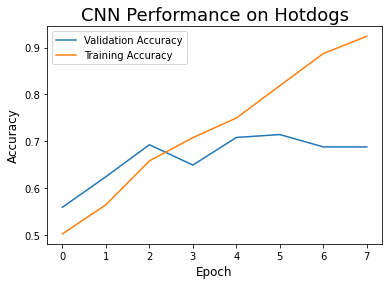

Accuracy: 68.8


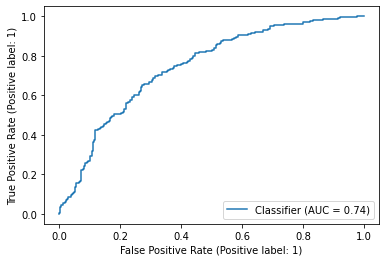

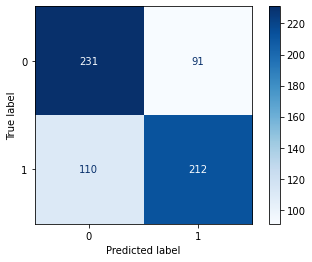

Epoch 1/100
12/12 [==============================] - 66s 6s/step - loss: 2.2839 - accuracy: 0.5030 - val_loss: 0.7152 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 65s 5s/step - loss: 0.7070 - accuracy: 0.5097 - val_loss: 0.6913 - val_accuracy: 0.5373
Epoch 3/100
12/12 [==============================] - 65s 5s/step - loss: 0.6774 - accuracy: 0.5673 - val_loss: 0.6519 - val_accuracy: 0.6009
Epoch 4/100
12/12 [==============================] - 65s 5s/step - loss: 0.6428 - accuracy: 0.6397 - val_loss: 0.6311 - val_accuracy: 0.6568
Epoch 5/100
12/12 [==============================] - 65s 5s/step - loss: 0.6228 - accuracy: 0.6520 - val_loss: 0.6166 - val_accuracy: 0.6832
Epoch 6/100
12/12 [==============================] - 65s 5s/step - loss: 0.5905 - accuracy: 0.7010 - val_loss: 0.5970 - val_accuracy: 0.7081
Epoch 7/100
12/12 [==============================] - 65s 5s/step - loss: 0.5574 - accuracy: 0.7237 - val_loss: 0.5851 - val_accuracy: 0.7220
Epoch 8/100
1

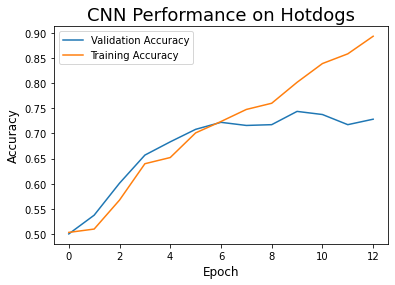

Accuracy: 72.8


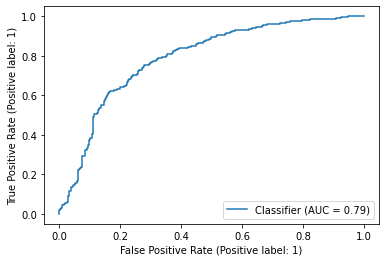

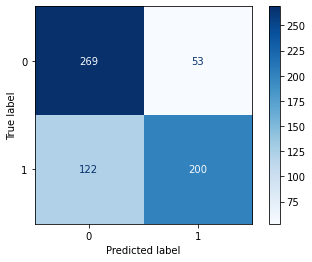

Epoch 1/100
12/12 [==============================] - 108s 9s/step - loss: 2.0729 - accuracy: 0.4853 - val_loss: 0.6889 - val_accuracy: 0.5248
Epoch 2/100
12/12 [==============================] - 108s 9s/step - loss: 0.6899 - accuracy: 0.5527 - val_loss: 0.6674 - val_accuracy: 0.5047
Epoch 3/100
12/12 [==============================] - 108s 9s/step - loss: 0.6520 - accuracy: 0.6107 - val_loss: 0.6274 - val_accuracy: 0.6537
Epoch 4/100
12/12 [==============================] - 107s 9s/step - loss: 0.6127 - accuracy: 0.6603 - val_loss: 0.5963 - val_accuracy: 0.6832
Epoch 5/100
12/12 [==============================] - 107s 9s/step - loss: 0.6011 - accuracy: 0.6827 - val_loss: 0.5955 - val_accuracy: 0.7236
Epoch 6/100
12/12 [==============================] - 107s 9s/step - loss: 0.5566 - accuracy: 0.7227 - val_loss: 0.5697 - val_accuracy: 0.7329
Epoch 7/100
12/12 [==============================] - 107s 9s/step - loss: 0.5086 - accuracy: 0.7550 - val_loss: 0.5614 - val_accuracy: 0.7453
Epoch 

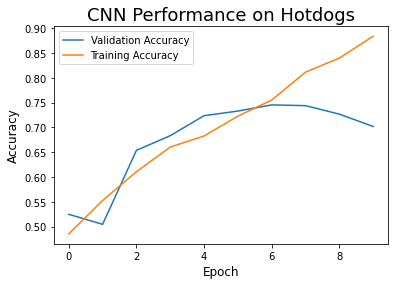

Accuracy: 70.2


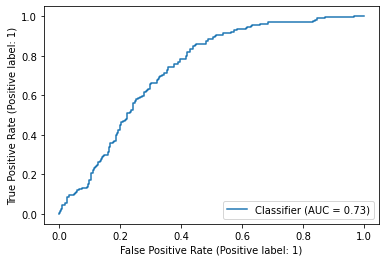

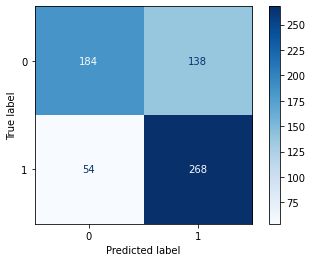

Epoch 1/100
12/12 [==============================] - 169s 14s/step - loss: 24.2262 - accuracy: 0.4917 - val_loss: 0.7451 - val_accuracy: 0.5016
Epoch 2/100
12/12 [==============================] - 167s 14s/step - loss: 1.4070 - accuracy: 0.5127 - val_loss: 0.6684 - val_accuracy: 0.5078
Epoch 3/100
12/12 [==============================] - 166s 14s/step - loss: 0.6440 - accuracy: 0.5630 - val_loss: 0.6270 - val_accuracy: 0.6615
Epoch 4/100
12/12 [==============================] - 166s 14s/step - loss: 0.5787 - accuracy: 0.6953 - val_loss: 0.5996 - val_accuracy: 0.6817
Epoch 5/100
12/12 [==============================] - 165s 14s/step - loss: 0.4939 - accuracy: 0.7813 - val_loss: 0.6261 - val_accuracy: 0.6925
Epoch 6/100
12/12 [==============================] - 165s 14s/step - loss: 0.3710 - accuracy: 0.8647 - val_loss: 0.7336 - val_accuracy: 0.6398
Epoch 7/100
12/12 [==============================] - 166s 14s/step - loss: 0.2375 - accuracy: 0.9150 - val_loss: 0.8417 - val_accuracy: 0.652

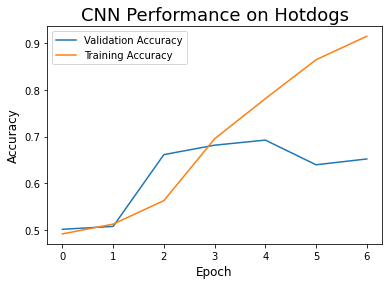

Accuracy: 65.2


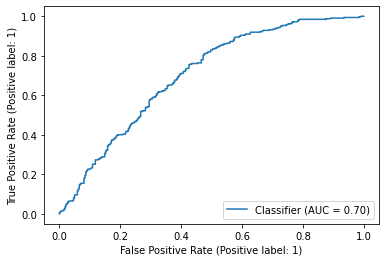

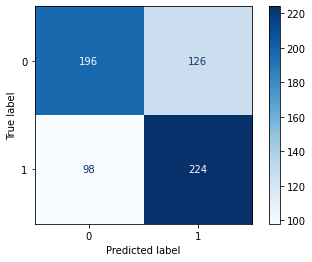

Epoch 1/100
12/12 [==============================] - 166s 14s/step - loss: 15.8086 - accuracy: 0.5017 - val_loss: 0.7390 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 159s 13s/step - loss: 0.9671 - accuracy: 0.5267 - val_loss: 0.6632 - val_accuracy: 0.5683
Epoch 3/100
12/12 [==============================] - 160s 13s/step - loss: 0.6604 - accuracy: 0.5817 - val_loss: 0.6279 - val_accuracy: 0.6460
Epoch 4/100
12/12 [==============================] - 162s 13s/step - loss: 0.6279 - accuracy: 0.6477 - val_loss: 0.6228 - val_accuracy: 0.6475
Epoch 5/100
12/12 [==============================] - 162s 14s/step - loss: 0.5910 - accuracy: 0.7007 - val_loss: 0.6173 - val_accuracy: 0.6925
Epoch 6/100
12/12 [==============================] - 161s 13s/step - loss: 0.5185 - accuracy: 0.7647 - val_loss: 0.6084 - val_accuracy: 0.7112
Epoch 7/100
12/12 [==============================] - 162s 13s/step - loss: 0.4155 - accuracy: 0.8333 - val_loss: 0.6820 - val_accuracy: 0.677

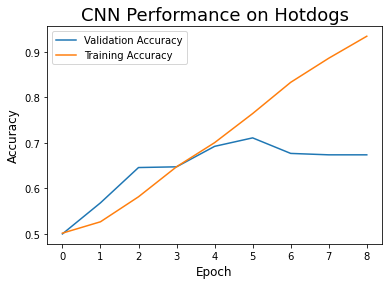

Accuracy: 67.4


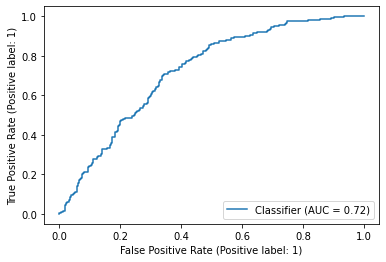

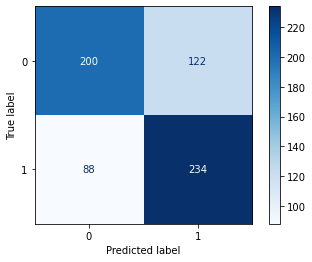

{0: {'acc': 68.5, 'auc': 76.1},
 1: {'acc': 69.1, 'auc': 73.7},
 2: {'acc': 68.8, 'auc': 74.3},
 3: {'acc': 72.8, 'auc': 79.0},
 4: {'acc': 70.2, 'auc': 73.3},
 5: {'acc': 65.2, 'auc': 70.2},
 6: {'acc': 67.4, 'auc': 72.0}}

In [52]:
models = [model_0, model_1, model_2, model_3, model_4, model_5, model_6]
model_log = fit_model(models)
model_log

It looks like model_3 with a 3rd layer is the clear winner. Time to save the model.

In [55]:
save_model(model_3, './hotdog_model/hotdog.keras')

Time to test the model

In [60]:
# hot dog test
path_new_img_1 = './hotdog_data/test/hotdog/1501.jpg'
# not hot dog test
path_new_img_0 = './hotdog_data/test/nothotdog/153.jpg'

In [61]:
def make_pred(image_path, clf):
    # import image from path
    image = np.array(Image.open(image_path))
    image = image.astype('float16')
    image /= 255.

    #predit class
    pred_proba = clf.predict(image.reshape(-1, 299, 299, 3))
    pred = np.round(pred_proba[0][0])
    
    return 'hotdog' if pred == 1 else 'nothotdog'

Do we have a hotdog?

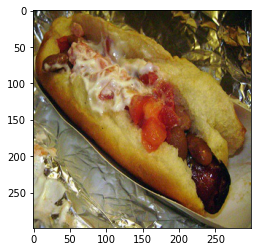

'hotdog'

In [62]:
plt.imshow(Image.open(path_new_img_1));
plt.show()
make_pred(path_new_img_1, model_3)   # should predict hotdog

Thats a hotdog!

Do we have a not hotdog?

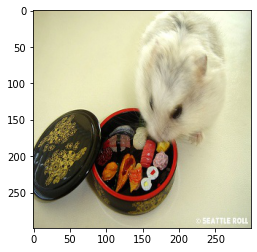

'nothotdog'

In [64]:
plt.imshow(Image.open(path_new_img_0));
plt.show()
make_pred(path_new_img_0, model_3)   # shot predit nothotdog

That is not a hotdog!